In [104]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
from src.features import build_features as f
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, log_loss


%matplotlib inline

In [1]:
from mlb_simulator.data.data_utils import query_mlb_db

In [2]:
import pandas as pd

# Data: List of dictionaries with team details
team_data = [
    {"Team ID": 108, "Code": "ana", "File Code": "ana", "Abbreviation": "LAA", "Name": "LA Angels", "Full Name": "Los Angeles Angels", "Brief Name": "Angels"},
    {"Team ID": 109, "Code": "ari", "File Code": "ari", "Abbreviation": "ARI", "Name": "Arizona", "Full Name": "Arizona Diamondbacks", "Brief Name": "D-backs"},
    {"Team ID": 110, "Code": "bal", "File Code": "bal", "Abbreviation": "BAL", "Name": "Baltimore", "Full Name": "Baltimore Orioles", "Brief Name": "Orioles"},
    {"Team ID": 111, "Code": "bos", "File Code": "bos", "Abbreviation": "BOS", "Name": "Boston", "Full Name": "Boston Red Sox", "Brief Name": "Red Sox"},
    {"Team ID": 112, "Code": "chn", "File Code": "chc", "Abbreviation": "CHC", "Name": "Chi Cubs", "Full Name": "Chicago Cubs", "Brief Name": "Cubs"},
    {"Team ID": 113, "Code": "cin", "File Code": "cin", "Abbreviation": "CIN", "Name": "Cincinnati", "Full Name": "Cincinnati Reds", "Brief Name": "Reds"},
    {"Team ID": 114, "Code": "cle", "File Code": "cle", "Abbreviation": "CLE", "Name": "Cleveland", "Full Name": "Cleveland Indians", "Brief Name": "Indians"},
    {"Team ID": 115, "Code": "col", "File Code": "col", "Abbreviation": "COL", "Name": "Colorado", "Full Name": "Colorado Rockies", "Brief Name": "Rockies"},
    {"Team ID": 116, "Code": "det", "File Code": "det", "Abbreviation": "DET", "Name": "Detroit", "Full Name": "Detroit Tigers", "Brief Name": "Tigers"},
    {"Team ID": 117, "Code": "hou", "File Code": "hou", "Abbreviation": "HOU", "Name": "Houston", "Full Name": "Houston Astros", "Brief Name": "Astros"},
    {"Team ID": 118, "Code": "kca", "File Code": "kc", "Abbreviation": "KC", "Name": "Kansas City", "Full Name": "Kansas City Royals", "Brief Name": "Royals"},
    {"Team ID": 119, "Code": "lan", "File Code": "la", "Abbreviation": "LAD", "Name": "LA Dodgers", "Full Name": "Los Angeles Dodgers", "Brief Name": "Dodgers"},
    {"Team ID": 120, "Code": "was", "File Code": "was", "Abbreviation": "WSH", "Name": "Washington", "Full Name": "Washington Nationals", "Brief Name": "Nationals"},
    {"Team ID": 121, "Code": "nyn", "File Code": "nym", "Abbreviation": "NYM", "Name": "NY Mets", "Full Name": "New York Mets", "Brief Name": "Mets"},
    {"Team ID": 133, "Code": "oak", "File Code": "oak", "Abbreviation": "OAK", "Name": "Oakland", "Full Name": "Oakland Athletics", "Brief Name": "Athletics"},
    {"Team ID": 134, "Code": "pit", "File Code": "pit", "Abbreviation": "PIT", "Name": "Pittsburgh", "Full Name": "Pittsburgh Pirates", "Brief Name": "Pirates"},
    {"Team ID": 135, "Code": "sdn", "File Code": "sd", "Abbreviation": "SD", "Name": "San Diego", "Full Name": "San Diego Padres", "Brief Name": "Padres"},
    {"Team ID": 136, "Code": "sea", "File Code": "sea", "Abbreviation": "SEA", "Name": "Seattle", "Full Name": "Seattle Mariners", "Brief Name": "Mariners"},
    {"Team ID": 137, "Code": "sfn", "File Code": "sf", "Abbreviation": "SF", "Name": "San Francisco", "Full Name": "San Francisco Giants", "Brief Name": "Giants"},
    {"Team ID": 138, "Code": "sln", "File Code": "stl", "Abbreviation": "STL", "Name": "St. Louis", "Full Name": "St. Louis Cardinals", "Brief Name": "Cardinals"},
    {"Team ID": 139, "Code": "tba", "File Code": "tb", "Abbreviation": "TB", "Name": "Tampa Bay", "Full Name": "Tampa Bay Rays", "Brief Name": "Rays"},
    {"Team ID": 140, "Code": "tex", "File Code": "tex", "Abbreviation": "TEX", "Name": "Texas", "Full Name": "Texas Rangers", "Brief Name": "Rangers"},
    {"Team ID": 141, "Code": "tor", "File Code": "tor", "Abbreviation": "TOR", "Name": "Toronto", "Full Name": "Toronto Blue Jays", "Brief Name": "Blue Jays"},
    {"Team ID": 142, "Code": "min", "File Code": "min", "Abbreviation": "MIN", "Name": "Minnesota", "Full Name": "Minnesota Twins", "Brief Name": "Twins"},
    {"Team ID": 143, "Code": "phi", "File Code": "phi", "Abbreviation": "PHI", "Name": "Philadelphia", "Full Name": "Philadelphia Phillies", "Brief Name": "Phillies"},
    {"Team ID": 144, "Code": "atl", "File Code": "atl", "Abbreviation": "ATL", "Name": "Atlanta", "Full Name": "Atlanta Braves", "Brief Name": "Braves"},
    {"Team ID": 145, "Code": "cha", "File Code": "cws", "Abbreviation": "CWS", "Name": "Chi White Sox", "Full Name": "Chicago White Sox", "Brief Name": "White Sox"},
    {"Team ID": 146, "Code": "mia", "File Code": "mia", "Abbreviation": "MIA", "Name": "Miami", "Full Name": "Miami Marlins", "Brief Name": "Marlins"},
    {"Team ID": 147, "Code": "nya", "File Code": "nyy", "Abbreviation": "NYY", "Name": "NY Yankees", "Full Name": "New York Yankees", "Brief Name": "Yankees"},
    {"Team ID": 158, "Code": "mil", "File Code": "mil", "Abbreviation": "MIL", "Name": "Milwaukee", "Full Name": "Milwaukee Brewers", "Brief Name": "Brewers"},
    {"Team ID": 159, "Code": "aas", "File Code": "al", "Abbreviation": "AL", "Name": "AL All-Stars", "Full Name": "American League All-Stars", "Brief Name": "AL All-Stars"},
    {"Team ID": 160, "Code": "nas", "File Code": "nl", "Abbreviation": "NL", "Name": "NL All-Stars", "Full Name": "National League All-Stars", "Brief Name": "NL All-Stars"},
]

# List of team abbreviations provided
team_abbreviations = [
    "BOS", "LAD", "MIL", "HOU", "CLE", "NYY", "ATL", "COL", "OAK", "WSH",
    "TOR", "TEX", "STL", "PIT", "MIA", "DET", "CWS", "ARI", "PHI", "SD",
    "KC", "BAL", "TB", "SEA", "SF", "NYM", "MIN", "LAA", "CIN", "CHC"
]

# Create a DataFrame from the list of team data
df = pd.DataFrame(team_data)

# Filter the DataFrame to include only the teams in the provided list
filtered_df = df[df['Abbreviation'].isin(team_abbreviations)][['Team ID', 'Name']]

# Reset the index for the final DataFrame
filtered_df = filtered_df.reset_index(drop=True)

print(filtered_df)


    Team ID           Name
0       108      LA Angels
1       109        Arizona
2       110      Baltimore
3       111         Boston
4       112       Chi Cubs
5       113     Cincinnati
6       114      Cleveland
7       115       Colorado
8       116        Detroit
9       117        Houston
10      118    Kansas City
11      119     LA Dodgers
12      120     Washington
13      121        NY Mets
14      133        Oakland
15      134     Pittsburgh
16      135      San Diego
17      136        Seattle
18      137  San Francisco
19      138      St. Louis
20      139      Tampa Bay
21      140          Texas
22      141        Toronto
23      142      Minnesota
24      143   Philadelphia
25      144        Atlanta
26      145  Chi White Sox
27      146          Miami
28      147     NY Yankees
29      158      Milwaukee


In [3]:
team_codes = query_mlb_db('select distinct home_team from Statcast')

In [25]:
team_codes.rename({'STATCAST':'statcast_name'}, axis=1, inplace=True)

In [47]:
import pandas as pd
from mlb_simulator.data.data_utils import get_mlb_db_engine 

upload_df = pd.merge(team_codes, df, how='left', left_on='statcast_name', right_on='Abbreviation').rename({'Team ID':'team_id'}, axis=1)[['statcast_name', 'team_id']]
upload_df.set_index('statcast_name', inplace=True)
upload_df.loc['AZ'] = 109
final = upload_df.astype(int).reset_index()

engine = get_mlb_db_engine()

final.to_sql('TeamIdMapping', engine, if_exists='replace', index=False)

30

In [5]:
from mlb_simulator.models.batting import hit_outcome as h

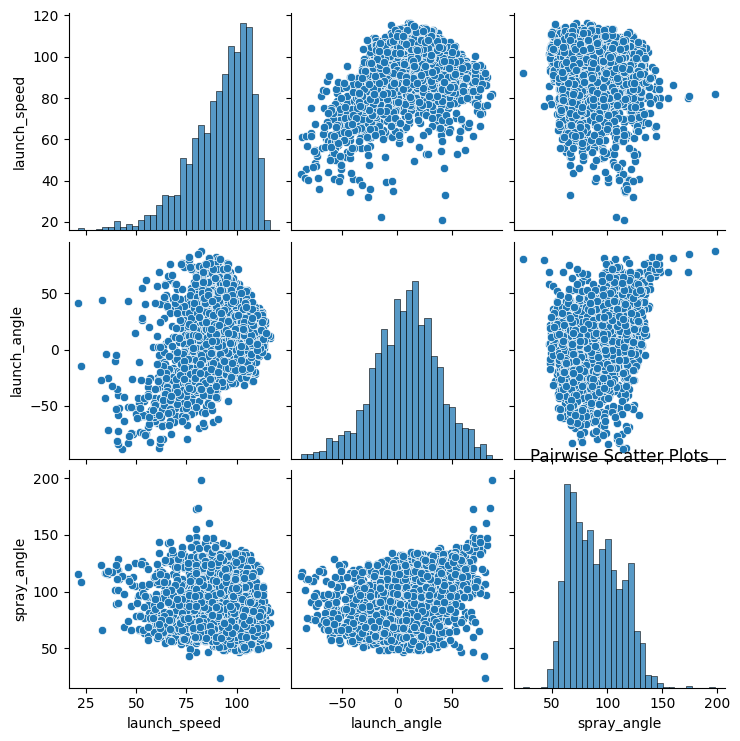

In [6]:
vladdy = 665489
soto = 665742
schneider = 676914
biggio = 624415
showtime = 660271
crowser = 681297

batter_id = soto

h.fit_hit_outcome_model(batter_id)



In [260]:
vladdy = 665489
soto = 665742
schneider = 676914
biggio = 624415
showtime = 660271
crowser = 681297
681297
batter = vladdy


X_train, y_train, X_test, y_test, encoders = f.get_pitch_outcome_dataset_xgb(batter, split=True)

In [8]:
import numpy as np
import pyvinecopulib as pv

# Example data
np.random.seed(42)
n = 1000
Z = np.random.normal(size=n)
X = 2 * Z + np.random.normal(size=n)
Y = -0.5 * Z + np.random.normal(size=n)
data = np.column_stack([X, Y, Z])

# Fit the vine copula model to the data
# We are conditioning on Z, so we use its index (2) to specify the conditional variable
conditional_indices = [2]

# Fit a pair copula to X and Y conditionally on Z
bicop = pv.Bicop(data[:, [0, 1, 2]], families=pv.Family.ALL)
bicop.select()

# Now you can use the fitted model for various purposes
# For example, you can simulate new data or evaluate the copula density

# Simulate new data conditionally on Z
conditional_z = np.array([[0.5]])  # Example conditional value for Z
simulated_data = bicop.simulate(100, conditional_indices=conditional_indices, conditional_values=conditional_z)

print("Simulated Data:")
print(simulated_data)

# Evaluate the copula density for given data points conditionally on Z
u = np.array([[0.1, 0.5]])
density = bicop.pdf(u, conditional_indices=conditional_indices, conditional_values=conditional_z)
print("Copula Density:")
print(density)


AttributeError: module 'pyvinecopulib' has no attribute 'Family'

In [261]:
from src.data.data_utils import query_mlb_db
batter_id = crowser
data = query_mlb_db(f'''
select 
            case
                when description='swinging_strike' or description='swinging_strike_blocked' or description='called_strike' or description='foul_tip' 
                    or description='swinging_pitchout' then 'strike'
                when description='foul' or description='foul_pitchout' then 'foul'
                when description='ball' or description='blocked_ball' or description='pitchout' then 'ball'
                when description='hit_by_pitch' then 'hit_by_pitch'
                when description='hit_into_play' then 'hit_into_play'
                else NULL
            end as pitch_outcome,

            p_throws,
            
            pitch_number, strikes, balls,
            
            release_speed, 
            release_spin_rate, 
            release_extension,

            release_pos_x,
            release_pos_y,
            release_pos_z,
            
            spin_axis,
            pfx_x, pfx_z, 
            
            vx0, vy0, vz0,
            ax, ay, az,
            plate_x, plate_z
            
        from Statcast
        where batter={batter_id}
        /* and game_pk in (
                select distinct game_pk
                from Statcast
                where batter = {batter_id}
                order by game_date desc
                limit 324
        ) */
        and pitch_outcome & p_throws & pitch_number & strikes & balls &
            release_speed &
            release_spin_rate &
            release_extension &

            release_pos_x &
            release_pos_y &
            release_pos_z &
            
            spin_axis &
            pfx_x & pfx_z &
            
            vx0 & vy0 & vz0 &
            ax & ay & az &
            plate_x & plate_z
        is not null
        order by game_date asc, at_bat_number asc, pitch_number asc;
''')



In [262]:
data = data[['pitch_outcome', 'p_throws', 'strikes', 'balls', 'release_speed', 'release_spin_rate', 'plate_x', 'plate_z']]

In [263]:
# Define features and target
features = data.drop(columns=['pitch_outcome'])
target = data['pitch_outcome']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(target)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_encoded, test_size=0.2, shuffle=False)

In [264]:
X_train

,p_throws,strikes,balls,release_speed,release_spin_rate,plate_x,plate_z
0,R,0,0,91.4,2397,-0.70,3.17
1,R,1,0,91.2,2382,0.70,3.50
2,R,1,1,84.3,1905,0.23,1.78
3,R,2,1,84.9,1789,-0.24,1.05
4,R,0,0,82.8,2428,1.44,1.32
...,...,...,...,...,...,...,...
913,R,2,2,96.2,2334,-0.15,2.79
914,R,2,2,82.9,2484,0.47,2.81
915,R,0,0,94.2,2283,-0.77,2.01
916,R,1,0,84.2,2131,-0.36,2.24


In [265]:
# Preprocessing pipeline
numeric_features = features.select_dtypes(include=['float64', 'int64']).columns
categorical_features = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

import xgboost as xgb
from sklearn.metrics import classification_report, log_loss

# Train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(n_estimators=25, eval_metric='mlogloss'))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))
print('Log Loss:', log_loss(y_test, y_prob))

               precision    recall  f1-score   support

         ball       0.79      0.88      0.83        88
         foul       0.29      0.24      0.27        45
 hit_by_pitch       0.00      0.00      0.00         1
hit_into_play       0.25      0.17      0.20        29
       strike       0.50      0.55      0.52        67

     accuracy                           0.57       230
    macro avg       0.37      0.37      0.36       230
 weighted avg       0.53      0.57      0.55       230

Log Loss: 1.0214223187100118


/home/colclour/miniconda3/envs/mlb/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/colclour/miniconda3/envs/mlb/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/colclour/miniconda3/envs/mlb/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [266]:
label_encoder.inverse_transform(list(range(5)))

array(['ball', 'foul', 'hit_by_pitch', 'hit_into_play', 'strike'],
      dtype=object)

In [173]:
#log loss 0.897 with 5 vars
#snched 1.022

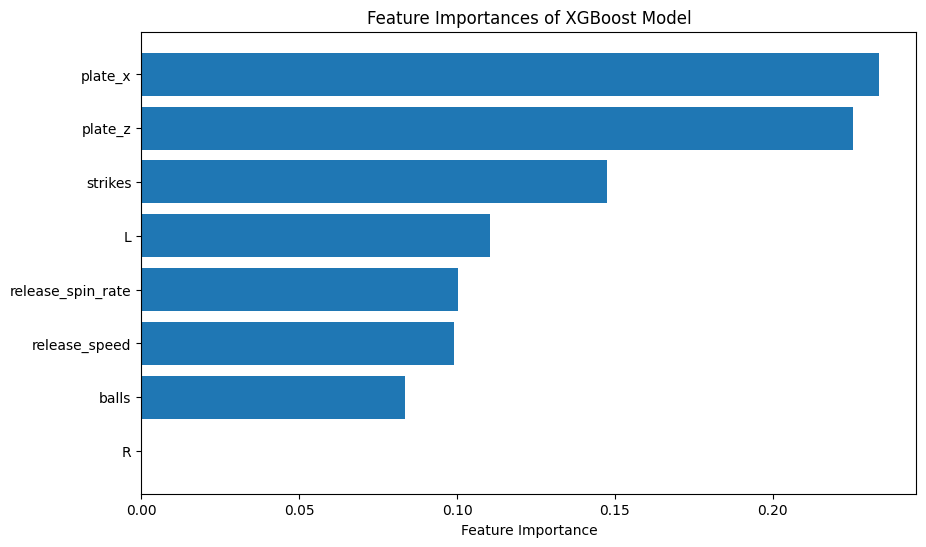

Log Likelihood (Log Loss): 1.0214223187100118


In [267]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

# Extract the trained XGBoost model from the pipeline
xgb_model = model.named_steps['classifier']

# Get feature names after preprocessing
onehot_categories = model.named_steps['preprocessor'].named_transformers_['cat'].categories_
onehot_feature_names = np.concatenate(onehot_categories)
feature_names = np.concatenate([numeric_features, onehot_feature_names])
#feature_names = numeric_features

# Plot feature importances
importance = xgb_model.feature_importances_
sorted_idx = np.argsort(importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances of XGBoost Model')
plt.show()

# Compute log likelihood (log loss)
y_prob = model.predict_proba(X_test)
log_likelihood = log_loss(y_test, y_prob)

print('Log Likelihood (Log Loss):', log_likelihood)


In [242]:
model.predict_proba(X_train)

array([[0.07542545, 0.1394123 , 0.00322401, 0.15980217, 0.62213606],
       [0.92866606, 0.02495675, 0.00145642, 0.01528813, 0.02963264],
       [0.03761526, 0.2800743 , 0.00419078, 0.10591669, 0.572203  ],
       ...,
       [0.70596784, 0.0277673 , 0.00285659, 0.03606213, 0.22734609],
       [0.8040941 , 0.07027993, 0.00300566, 0.07312936, 0.04949096],
       [0.01920201, 0.24298808, 0.00326522, 0.17741074, 0.557134  ]],
      dtype=float32)

In [268]:
def sample_predictions(classifier, X):
    pred_proba = classifier.predict_proba(X)
    sampled_predictions = np.array([np.random.choice(classifier.classes_, p=proba) for proba in pred_proba])

    return sampled_predictions

In [291]:
batter_id

681297

In [290]:

sampled_preds = sample_predictions(model, X_test)
pred_counts = pd.DataFrame(label_encoder.inverse_transform(sampled_preds)).value_counts()
actual_counts = pd.DataFrame(label_encoder.inverse_transform(y_test)).value_counts()

from scipy.stats import chisquare

# Align the indices of both counts
pred_counts = pred_counts.reindex(actual_counts.index, fill_value=0)

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=actual_counts, f_exp=pred_counts)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

# Interpretation of the result
if p_value < 0.05:
    print("The distributions are significantly different (reject the null hypothesis).")
else:
    print("The distributions are not significantly different (fail to reject the null hypothesis).")

Chi-square statistic: 3.3005212570429965
p-value: 0.5088496735067902
The distributions are not significantly different (fail to reject the null hypothesis).
